This notebook is related to **"TESTING"**

In [ ]:
# FIRST build and train the model to run the cells in TESTING section

In [ ]:
# Skip Model section

#### **MODEL**

In [3]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten

In [4]:
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
data = cifar10
(X_train, Y_train), (X_test, Y_test) = data.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x)      
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      
  # removed MaxPooling                                        
x = layers.Dropout(0.2)(x)             

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)         

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)     

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)              # added
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=50,batch_size=64)

Epoch 1/50
782/782 [==============================] - 36s 26ms/step - loss: 1.6966 - accuracy: 0.4231
Epoch 2/50
782/782 [==============================] - 17s 21ms/step - loss: 1.0383 - accuracy: 0.6331
Epoch 3/50
782/782 [==============================] - 16s 21ms/step - loss: 0.8266 - accuracy: 0.7123
Epoch 4/50
782/782 [==============================] - 17s 21ms/step - loss: 0.7153 - accuracy: 0.7552
Epoch 5/50
782/782 [==============================] - 17s 21ms/step - loss: 0.6387 - accuracy: 0.7840
Epoch 6/50
782/782 [==============================] - 17s 22ms/step - loss: 0.5775 - accuracy: 0.8017
Epoch 7/50
782/782 [==============================] - 17s 22ms/step - loss: 0.5275 - accuracy: 0.8210
Epoch 8/50
782/782 [==============================] - 17s 22ms/step - loss: 0.4804 - accuracy: 0.8390
Epoch 9/50
782/782 [==============================] - 17s 22ms/step - loss: 0.4469 - accuracy: 0.8455
Epoch 10/50
782/782 [==============================] - 17s 22ms/step - loss: 0.419

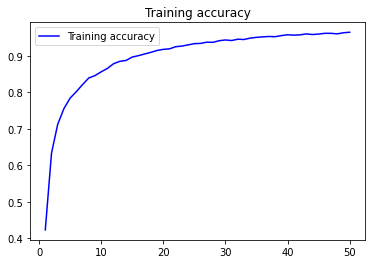

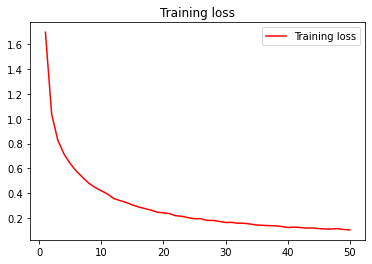

In [ ]:
# Plot Model Loss and Accuracy During Training
%matplotlib inline
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='r')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# ACCURACY = 88.8%
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4399 - accuracy: 0.8884


[0.43988457322120667, 0.8884000182151794]

#### **TESTING**

In [ ]:
# Model predictions:
import numpy as np
y_pred = model.predict(X_test)
  # Each element of y_pred is a list of 10 numbers(probabilities)

y_pclasses = [np.argmax(element) for element in y_pred]
  # This shows the class of max probability

In [ ]:
# Actual predictions:
#Y_test.reshape(-1,)
  # This is a list of actual labels of the test data

In [ ]:
# Creating a list which contains the indexes of wrong predictions:
predictions_diff = Y_test.reshape(-1,) - y_pclasses
i = 0
a = []
for single_pd in predictions_diff:
  if single_pd != 0:
    a.append(i)
  i+=1;

# Length of wrong predictions:
len(a)

1149

In [ ]:
#rough
# indexes of the beginning and the end
# print(a[:5],a[-5:])

# Everything is clear untill now

In [ ]:
# Plotting the input image for the wrong prediction
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

"""
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_test, Y_test.reshape(-1,), 24)
"""

'\ndef plot_sample(X, y, index):\n    plt.figure(figsize = (15,2))\n    plt.imshow(X[index])\n    plt.xlabel(classes[y[index]])\n\nplot_sample(X_test, Y_test.reshape(-1,), 24)\n'

In [ ]:
# What was the wrong prediction?
# classes[y_pclasses[index]]

# What was the right prediction?
# classes[Y_test.reshape(-1,)[index]]

In [ ]:
# Probabilities of wrong predictions only:
y_wpred = model.predict(X_test[a])
len(y_wpred)

1149

In [ ]:
# Max:
max_ypred = np.max(y_wpred, axis=1)
len(max_ypred)

1149

In [ ]:
# Average, top5, and bottom5
print('Average:', np.round(np.average(max_ypred),2))

sorted_index_array = np.argsort(max_ypred)
sorted_array = max_ypred[sorted_index_array]
rslt1 = sorted_array[-50 : ]
rslt2 = sorted_array[ : 5]
print('top 50:', np.round(rslt1,10))
print('bottom 5:', np.round(rslt2,2))

Average: 0.78
top 50: [0.9992758  0.9992785  0.9993092  0.9993136  0.9993281  0.9993461
 0.99937886 0.9993967  0.99941367 0.99942654 0.99945945 0.999461
 0.9994666  0.9995162  0.9995949  0.9996004  0.99960905 0.9996102
 0.99962175 0.99966544 0.9996763  0.99971104 0.9997177  0.99975765
 0.99980575 0.999818   0.99983823 0.99985695 0.9998584  0.999889
 0.9998927  0.9998932  0.9998946  0.9998983  0.9999268  0.999929
 0.99994695 0.99995667 0.9999618  0.9999665  0.9999698  0.99997294
 0.9999746  0.99998856 0.999992   0.999993   0.9999954  0.9999976
 0.9999984  1.        ]
bottom 5: [0.27 0.29 0.3  0.3  0.31]


In [ ]:
# THE END OF TASK 01:
set1, set2, set3, set4 = ([] for i in range(4))

for p in max_ypred:
  if p < 0.7:
    set1.append(p)
  elif p < 0.9:
    set2.append(p)
  elif p < 0.95:
    set3.append(p)
  else:
    set4.append(p)

print('Wrong Probabilities lying in ranges 0-70%, 70-90%, 90-95%, 95-100% are:')
print(len(set1), len(set2), len(set3), len(set4), sep=' -- ')

Wrong Probabilities lying in ranges 0-70%, 70-90%, 90-95%, 95-100% are:
401 -- 283 -- 112 -- 353


In [ ]:
#rough
#376+291+477

In [ ]:
# Max of all pred:
max_ypred_all = np.max(y_pred, axis=1)

In [ ]:
#rough
set5 = []
set6 = []

for p in max_ypred_all:
  if p > 0.95:
    set5.append(p)
  else:
    set6.append(p)

print('no. of all predictions having max probability > 95% =', len(set5))
print('right predictions having probability less than 95% =', end=' ')
len(set6) - 401 - 283 - 112

no. of all predictions having max probability > 95% = 8230
right predictions having probability less than 95% = 

974

In [ ]:
#rough
# 401 + 283 + 112 = 796

In [ ]:
#rough
set5 = []

for p in max_ypred:
  if p < 0.5:
    set5.append(p)

print('no. of all predictions having max probability < 70% = 678')
print('right predictions having probability less than 70% = 277')
print('wrong predictions having probability less than 70% = 401', end='\n\n')

print('no. of all predictions having max probability < 50% = 147')
print('right predictions having probability less than 50% =', 147-97)
print('wrong predictions having probability less than 50% =', len(set5))

In [ ]:
# CONCLUSION:
"""
- Average wrong max probability = 78%
- Minimum wrong max probalility = 27%
- So many entries are around ~100% for wrong max probabilities

- Right predictions having probability less than 95% = 974
- Wrong predictions having probability less than 95% = 796

- Not good results for less than 50 and 70 probabilities also
"""

**FOR TASK2:**

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
# What was the wrong prediction?
# classes[y_pclasses[index]]

# What was the right prediction?
# classes[Y_test.reshape(-1,)[index]]

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
y_pclasses = [np.argmax(element) for element in y_pred]

In [ ]:
# Creating a list which contains the indexes of wrong predictions:
predictions_diff = Y_test.reshape(-1,) - y_pclasses
i = 0
a = []
for single_pd in predictions_diff:
  if single_pd != 0:
    a.append(i)
  i+=1;

# Length of wrong predictions:
len(a)

1116

In [ ]:
# actual classes for wrong predictions:
actual_classes_wypred = []
for i in range(len(a)):
  actual_classes_wypred.append(classes[Y_test.reshape(-1,)[a[i]]])
  # 'a' is the indexes for the wrong predictions
  # actual_classes_wypred is a list of string containing the acutal names instead of integers

In [ ]:
len(actual_classes_wypred)

1116

In [ ]:
# function to find the most common element:
import statistics
from statistics import mode
 
def most_common(List):
    return(mode(List))
   
print(most_common(actual_classes_wypred))

cat


In [ ]:
reducing_list_a = actual_classes_wypred[:]
top3_mc= []

for i in range(3):
  top3_mc.append(most_common(reducing_list_a))
  counter = 0
  while top3_mc[i] in reducing_list_a:
    reducing_list_a.remove(top3_mc[i])
    counter+=1
  print('counter',i, '=', counter)
print(top3_mc)

counter 0 = 223
counter 1 = 165
counter 2 = 162
['cat', 'bird', 'dog']


In [ ]:
# Problem solved:
# If you want to copy a list, you can use slice operation:
"""
list11 = [1,2,3,4,5,3,4,6,8,1,3,4,7,5,3,7,9,6,2]
list12 = list11[:]
while 3 in list12:
  list12.remove(3)
print(list11)
print(list12)
"""

'\nlist11 = [1,2,3,4,5,3,4,6,8,1,3,4,7,5,3,7,9,6,2]\nlist12 = list11[:]\nwhile 3 in list12:\n  list12.remove(3)\nprint(list11)\nprint(list12)\n'

**IMP RESULT:**

In [ ]:
# Another way:
import pandas as pd
count = pd.Series(actual_classes_wypred).value_counts()
print ("Element    Count", count, sep='\n')

Element    Count
cat           223
bird          165
dog           162
frog          109
airplane      107
horse          93
deer           91
truck          66
ship           59
automobile     41
dtype: int64


In [ ]:
# Percentages:
pd.Series(actual_classes_wypred).value_counts(normalize=True)

cat           0.199821
bird          0.147849
dog           0.145161
frog          0.097670
airplane      0.095878
horse         0.083333
deer          0.081541
truck         0.059140
ship          0.052867
automobile    0.036738
dtype: float64

**CONCLUSION:**

In [ ]:
# CONCLUSION:
  # The predictions for 'automobile' are 05 times better than the predictions of 'cat'
  # There is a difference of 16% from highest to lowest

In [ ]:
# ALHAMDULILLAH! 
  # ALL CLEAR TILL THIS STAGE

In [ ]:
#rough
  # finding indices of same repetitive elements
#list2 = ['cat', 'bat', 'mat', 'bat', 'cat', 'pet', 'bat', 'mat']
#[i for i, x in enumerate(list2) if x == "bat"]

In [ ]:
# b's are indices for top 3 most common actual indices
# and
# c's are the predicted classes against the top3 actual classes
b = []
c = []
for k in range(3):
  b.append([i for i, x in enumerate(actual_classes_wypred) if x == top3_mc[k]])
  c.append([classes[y_pclasses[b[k][j]]] for j in range(len(b[k]))])

In [ ]:
# Problem Solved!
# loop's 'i' was clashing with the enumerate's 'i'

In [ ]:
print(len(b[0]), len(b[1]), len(b[2]))
print(b[0][:10], b[1][:10], b[2][:10], sep='\n')

223 165 162
[4, 7, 9, 22, 26, 29, 33, 38, 42, 50]
[1, 10, 13, 19, 39, 40, 46, 49, 60, 65]
[0, 3, 11, 14, 16, 56, 59, 64, 66, 85]


In [ ]:
print(len(c[0]), len(c[1]), len(c[2]))
print(c[0][:10], c[1][:10], c[2][:10], sep='\n')

223 165 162
['frog', 'frog', 'automobile', 'deer', 'deer', 'frog', 'dog', 'truck', 'cat', 'truck']
['ship', 'airplane', 'horse', 'frog', 'dog', 'deer', 'cat', 'frog', 'horse', 'bird']
['cat', 'airplane', 'truck', 'truck', 'dog', 'horse', 'frog', 'frog', 'automobile', 'dog']


In [ ]:
#rough
# np.array([])
# np.append([])

In [ ]:
# rough
#classes[[5,6,4,2,3,8,9,1,2,6,5,1]]
#a=[1,2,3]
#classes[a]
# Above will give error because you are accessing a list instead of a numpy array through multiple indexes

'''
import numpy as np
list3 = np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
a=[1,2,3]
list3[a]
'''

In [ ]:
# rough
# Count occurrences of an element in a list
# list2 = ['cat', 'bat', 'mat', 'bat', 'cat', 'pet', 'bat', 'mat']
# list2.count('bat')

In [ ]:
'''
for i in range(3):
  mci = most_common(c[i])
  print('Most common prediction against actual class', top3_mc[i], '=', mci)
  print('    its numbers =', c[i].count(mci), 'out of', len(mci))
'''
# ERROR for c[1]:
  # "no unique mode; found 2 equally common values"
# Solution is in the following three cells

In [ ]:
# Wrong predictions against actual class 'CAT'
print('No. of wrong predictions against actual class CAT =', len(c[0]), end='\n\n')
count2 = pd.Series(c[0]).value_counts()
print ("Element    Count", count2, sep='\n')

No. of wrong predictions against actual class CAT = 223

Element    Count
bird          26
horse         25
airplane      24
frog          23
cat           23
automobile    22
truck         21
dog           20
ship          20
deer          19
dtype: int64


In [ ]:
# Observation: Difference of 3% from highest to lowest in the above result

In [ ]:
# Wrong predictions against actual class 'BIRD'
print('No. of wrong predictions against actual class BIRD =', len(c[1]), end='\n\n')
count3 = pd.Series(c[1]).value_counts()
print ("Element    Count", count3, sep='\n')

No. of wrong predictions against actual class BIRD = 165

Element    Count
airplane      23
cat           23
frog          20
truck         19
deer          16
horse         15
ship          14
dog           12
bird          12
automobile    11
dtype: int64


In [ ]:
# Observation: Difference of 7% from highest to lowest in the above result

In [ ]:
# Wrong predictions against actual class 'DOG'
print('No. of wrong predictions against actual class DOG =', len(c[2]), end='\n\n')
count4 = pd.Series(c[2]).value_counts()
print ("Element    Count", count4, sep='\n')

No. of wrong predictions against actual class DOG = 162

Element    Count
dog           20
airplane      18
automobile    18
truck         17
frog          17
horse         16
deer          15
ship          15
cat           13
bird          13
dtype: int64


In [ ]:
# Observation: Difference of 4% from highest to lowest in the above result

In [ ]:
#rough
# pd.Series(c[2]).value_counts(normalize=True)

In [ ]:
# Last task
# Plot 12 random images from X train or X test for Cats and Automobile
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
#[i for i, x in enumerate(list2) if x == "bat"]

In [14]:
import random
cat_classes = [i for i, x in enumerate(Y_train) if x == 3]
automobile_classes = [i for i, x in enumerate(Y_train) if x == 1]
res1 = random.sample(cat_classes, 12)
res2 = random.sample(automobile_classes, 12)
print(res1, res2, sep='\n')

[21914, 33177, 8786, 29439, 20505, 7121, 42408, 37236, 17557, 10070, 13953, 34061]
[9932, 23313, 23107, 38958, 48000, 45910, 40184, 30103, 5616, 19710, 212, 12685]


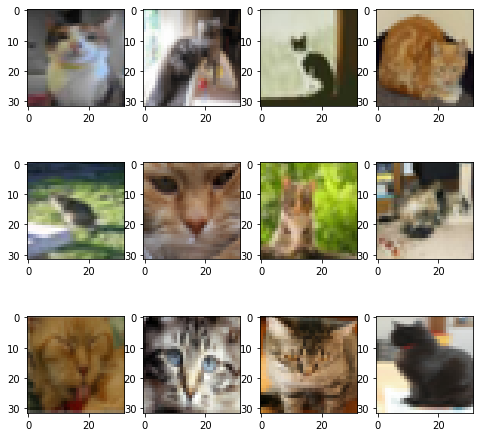

In [16]:
# PLOTTING CATS
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    img = X_train[res1[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

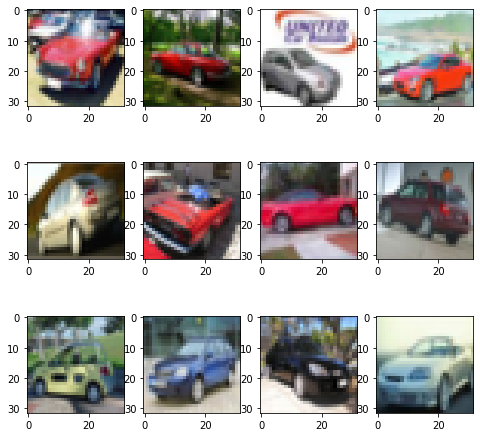

In [18]:
# PLOTTING AUTOMOBILES
fig=plt.figure(figsize=(8, 8))
for i in range(1, columns*rows +1):
    img = X_train[res2[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

**THE END**